# **INIT**


---



In [0]:
import numpy as np
import cv2
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Model, Sequential
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


#DATA PREPROCESSING

---



In [0]:
#VARIANTS########
onlyVolume=False;
dropVolume=True;
#################

array=pd.read_csv('dataset_Volume.csv')
pesi=pd.read_csv('weights.csv')

array=np.array(array,dtype=np.float32)
pesi=np.array(pesi,dtype=np.float32)
data=np.zeros((array.shape[0],array.shape[1]))
k=0


for j in array[:]:
  end=array[0].shape[0]
  for i in pesi[:]:
    if j[-1]==i[0]:
      j[-1]=i[1]
      data[k,:]=j
      k+=1
      break
      
#No volume
if (dropVolume==True):
  meta=data[:,1:]
else:
  if (onlyVolume==True):
    #Only volume
    meta=data[:,[0,-1]]
  else:
    meta=data
    
X=meta[:,:-1]
Y=meta[:,-1]

print(X.shape)
print(Y.shape)  

(2080, 8)
(2080,)


# REGRESSORS



---



## Fitting



In [0]:
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model as lm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

X, tX, Y, tY = train_test_split(X, Y, test_size = 0.25)
#pca=PCA(n_components=3)
#newX=pca.fit_transform(X)
print(len(X))
print(len(tX))

1560
520


In [0]:
#Linear#############################
linear=lm.LinearRegression()
linear.fit(X,Y)

lin_ridge=lm.Ridge(alpha=0.5)
lin_ridge.fit(X,Y)

lin_lasso=lm.Lasso(alpha=0.0000001)
lin_lasso.fit(X,Y)
####################################

Lasso(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#Stocastic#Gradient#Descent#########
sgd_squared=lm.SGDRegressor(loss='squared_loss')
sgd_squared.fit(X,Y)

sgd_Huber_Fix=lm.SGDRegressor(loss='huber')
sgd_Huber_Fix.fit(X,Y)

sgd_Huber_Adapt=lm.SGDRegressor(loss='huber',learning_rate='adaptive')
sgd_Huber_Adapt.fit(X,Y)
####################################

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
#k-Nearest#Neighbors################
kNN5=KNeighborsRegressor(n_neighbors=5)
kNN5.fit(X,Y)
kNN7=KNeighborsRegressor(n_neighbors=7)
kNN7.fit(X,Y)
kNN11=KNeighborsRegressor(n_neighbors=11)
kNN11.fit(X,Y)
####################################

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [0]:
#Random#Forest######################
RFreg55 = RandomForestRegressor(max_leaf_nodes=None,n_estimators=55,min_samples_split=2,criterion='mse')
RFreg55.fit(X,Y)

RFreg85 = RandomForestRegressor(max_leaf_nodes=None,n_estimators=85,min_samples_split=2,criterion='mse')
RFreg85.fit(X,Y)

RFreg125 = RandomForestRegressor(max_leaf_nodes=None,n_estimators=125,min_samples_split=2,criterion='mse')
RFreg125.fit(X,Y)
####################################

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=125,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
#Support#Vector#Machines############
svm_lin=SVR(kernel='linear')
svm_lin.fit(X,Y)

svm_poly=SVR(kernel='poly')
svm_poly.fit(X,Y)

svm_rbf=SVR(kernel='rbf')
svm_rbf.fit(X,Y)
####################################

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#Neural#Network#####################
nn10 = MLPRegressor(hidden_layer_sizes=(3,4,3),learning_rate='adaptive')
nn10.fit(X,Y)

nn30 = MLPRegressor(hidden_layer_sizes=(9,12,9),learning_rate='adaptive')
nn30.fit(X,Y)

nn50 = MLPRegressor(hidden_layer_sizes=(15,20,15),learning_rate='adaptive')
nn50.fit(X,Y)
####################################

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(15, 20, 15), learning_rate='adaptive',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
#Tree###############################
tree5 = DecisionTreeRegressor(max_depth=5)
tree5.fit(X,Y)

tree15 = DecisionTreeRegressor(max_depth=10)
tree15.fit(X,Y)

tree30 = DecisionTreeRegressor(max_depth=30)
tree30.fit(X,Y)
####################################

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Predictions and metrics



In [0]:
def predAndMetrics(a,b):
  #Linear regressors
  lin_pred= linear.predict(a)
  lin_ridge_pred= lin_ridge.predict(a)
  lin_lasso_pred= lin_lasso.predict(a)
  
  lin_MAE = mean_absolute_error(b , lin_pred)
  lin_ridge_MAE = mean_absolute_error(b , lin_ridge_pred)
  lin_lasso_MAE = mean_absolute_error(b , lin_lasso_pred)
  
  lin_MSE = mean_squared_error(b , lin_pred)
  lin_ridge_MSE = mean_squared_error(b , lin_ridge_pred)
  lin_lasso_MSE = mean_squared_error(b , lin_lasso_pred)
  
  
  #SGD
  sgd_squared_pred=sgd_squared.predict(a)
  sgd_Huber_Fix_pred=sgd_Huber_Fix.predict(a)
  sgd_Huber_Adapt_pred=sgd_Huber_Adapt.predict(a)
  
  sgd_squared_MAE=mean_absolute_error(b,sgd_squared_pred)
  sgd_Huber_Fix_MAE=mean_absolute_error(b,sgd_Huber_Fix_pred)
  sgd_Huber_Adapt_MAE=mean_absolute_error(b,sgd_Huber_Adapt_pred)
  
  sgd_squared_MSE=mean_squared_error(b,sgd_squared_pred)
  sgd_Huber_Fix_MSE=mean_squared_error(b,sgd_Huber_Fix_pred)
  sgd_Huber_Adapt_MSE=mean_squared_error(b,sgd_Huber_Adapt_pred)
  
  #RandomForest
  RF55_pred= RFreg55.predict(a)
  RF85_pred= RFreg85.predict(a)
  RF125_pred= RFreg125.predict(a)
  
  RF55_MAE = mean_absolute_error(b , RF55_pred)
  RF85_MAE = mean_absolute_error(b , RF85_pred)
  RF125_MAE = mean_absolute_error(b , RF125_pred)
  
  RF55_MSE = mean_squared_error(b , RF55_pred)
  RF85_MSE = mean_squared_error(b , RF85_pred)
  RF125_MSE = mean_squared_error(b , RF125_pred)
  
  #kNN
  kNN5_pred=kNN5.predict(a)
  kNN7_pred=kNN7.predict(a)
  kNN11_pred=kNN11.predict(a)
  
  kNN5_MAE=mean_absolute_error(b, kNN5_pred)
  kNN7_MAE=mean_absolute_error(b, kNN7_pred)
  kNN11_MAE=mean_absolute_error(b, kNN11_pred)
  
  kNN5_MSE=mean_squared_error(b, kNN5_pred)
  kNN7_MSE=mean_squared_error(b, kNN7_pred)
  kNN11_MSE=mean_squared_error(b, kNN11_pred)
  
  #tree
  tree5_pred=tree5.predict(a)
  tree15_pred=tree15.predict(a)
  tree30_pred=tree30.predict(a)
  
  tree5_MAE=mean_absolute_error(b, tree5_pred)
  tree15_MAE=mean_absolute_error(b, tree15_pred)
  tree30_MAE=mean_absolute_error(b, tree30_pred)
  
  tree5_MSE=mean_squared_error(b, tree5_pred)
  tree15_MSE=mean_squared_error(b, tree15_pred)
  tree30_MSE=mean_squared_error(b, tree30_pred)
  
  #NeuralNetworks
  nn10_pred=nn10.predict(a)
  nn30_pred=nn30.predict(a)
  nn50_pred=nn50.predict(a)
  
  nn10_MAE=mean_absolute_error(b,nn10_pred)
  nn30_MAE=mean_absolute_error(b,nn30_pred)
  nn50_MAE=mean_absolute_error(b,nn50_pred)
  
  nn10_MSE=mean_squared_error(b,nn10_pred)
  nn30_MSE=mean_squared_error(b,nn30_pred)
  nn50_MSE=mean_squared_error(b,nn50_pred)
  
  #SVM
  svm_lin_pred=svm_lin.predict(a)
  svm_poly_pred=svm_poly.predict(a)
  svm_rbf_pred=svm_rbf.predict(a)
  
  svm_lin_MAE=mean_absolute_error(b,svm_lin_pred)
  svm_poly_MAE=mean_absolute_error(b,svm_poly_pred)
  svm_rbf_MAE=mean_absolute_error(b,svm_rbf_pred)
  
  svm_lin_MSE=mean_squared_error(b,svm_lin_pred)
  svm_poly_MSE=mean_squared_error(b,svm_poly_pred)
  svm_rbf_MSE=mean_squared_error(b,svm_rbf_pred)
  
  
  metrics_list=list()
  metrics_list.append(("Linear",lin_MAE,lin_MSE,lin_pred))
  metrics_list.append(("Linear(Ridge)",lin_ridge_MAE,lin_ridge_MSE,lin_ridge_pred))
  metrics_list.append(("Linear(Lasso)",lin_lasso_MAE,lin_lasso_MSE,lin_lasso_pred))
  metrics_list.append(("SGD(MSE,fixed)",sgd_squared_MAE,sgd_squared_MSE,sgd_squared_pred))
  metrics_list.append(("SGD(Huber,fixed)",sgd_Huber_Fix_MAE,sgd_Huber_Fix_MSE,sgd_Huber_Fix_pred))
  metrics_list.append(("SGD(Huber,adaptive)",sgd_Huber_Adapt_MAE, sgd_Huber_Adapt_MSE, sgd_Huber_Adapt_pred))
  metrics_list.append(("RandomForest(n 55)",RF55_MAE,RF55_MSE,RF55_pred))
  metrics_list.append(("RandomForest(n 85)",RF85_MAE,RF85_MSE,RF85_pred))
  metrics_list.append(("RandomForest(n 125)",RF125_MAE,RF125_MSE,RF125_pred))
  metrics_list.append(("SVM(linear)",svm_lin_MAE,svm_lin_MSE,svm_lin_pred))
  metrics_list.append(("SVM(polynomial)",svm_poly_MAE,svm_poly_MSE,svm_poly_pred))
  metrics_list.append(("SVM(rbf)",svm_rbf_MAE,svm_rbf_MSE,svm_rbf_pred))
  metrics_list.append(("NeuralNetwork(n 10)",nn10_MAE,nn10_MSE,nn10_pred))
  metrics_list.append(("NeuralNetwork(n 30)",nn30_MAE,nn30_MSE,nn30_pred))
  metrics_list.append(("NeuralNetwork(n 50)",nn50_MAE,nn50_MSE,nn50_pred))
  metrics_list.append(("k-NearestNeighbors(n 5)",kNN5_MAE,kNN5_MSE,kNN5_pred))
  metrics_list.append(("k-NearestNeighbors(n 7)",kNN7_MAE,kNN7_MSE,kNN7_pred))
  metrics_list.append(("k-NearestNeighbors(n 11)",kNN11_MAE,kNN11_MSE,kNN11_pred))
  metrics_list.append(("Tree(d 5)",tree5_MAE,tree5_MSE,tree5_pred))
  metrics_list.append(("Tree(d 15)",tree15_MAE,tree15_MSE,tree15_pred))
  metrics_list.append(("Tree(d 30)",tree30_MAE,tree30_MSE,tree30_pred))
  return metrics_list


def show_results(data_list,label,stop=100):
  import matplotlib
  from matplotlib.pyplot import plot,scatter,show,legend,figure
  count=0
  for name,mae,mse,pred in metrics_list:
    figure(num=count)
    plot(pred[:stop],label=name)
    plot(label[:stop],label='Ground Truth')
    legend(loc='upper right')
    show()
    count+=1



#PERFORMANCE COMPARISON


---




## TRAINING SET

In [0]:
metrics_list=predAndMetrics(X,Y)
score_train=pd.DataFrame((i[0:3] for i in metrics_list), columns=["Method","Mean Absolute Error","Mean Squared Error"])
score_train=score_train.round(decimals=2)
score_train

,Method,Mean Absolute Error,Mean Squared Error
0,Linear,4.70,35.66
1,Linear(Ridge),4.90,39.80
2,Linear(Lasso),4.70,35.66
3,"SGD(MSE,fixed)",5.32,46.51
4,"SGD(Huber,fixed)",8.91,132.34
5,"SGD(Huber,adaptive)",8.47,114.58
6,RandomForest(n 55),1.05,2.31
7,RandomForest(n 85),1.03,2.18
8,RandomForest(n 125),1.03,2.16
9,SVM(linear),6.89,76.69


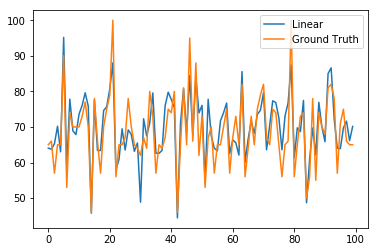

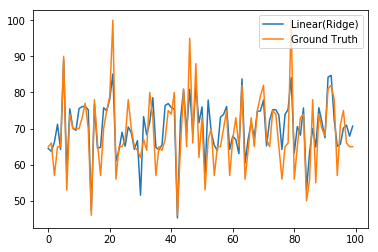

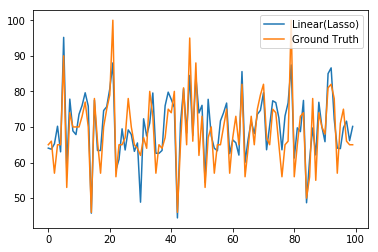

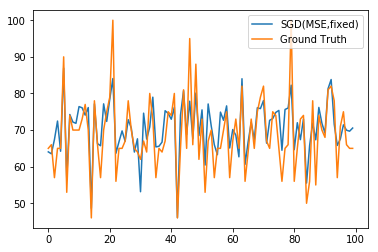

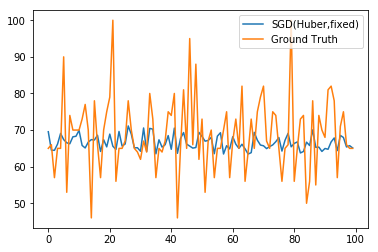

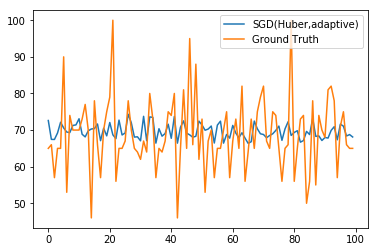

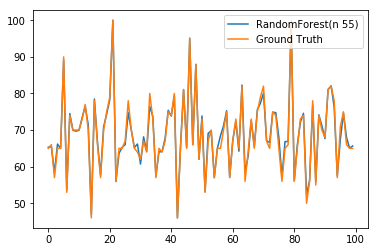

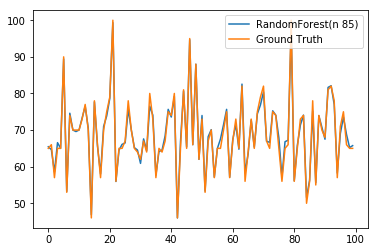

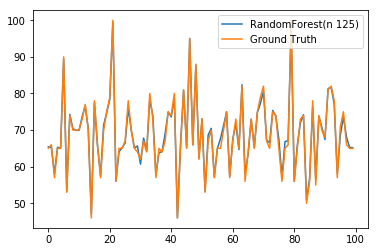

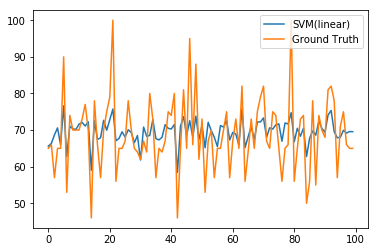

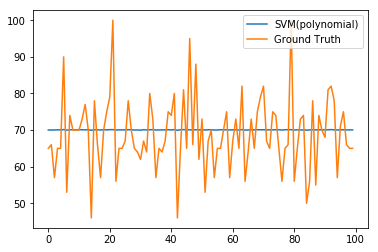

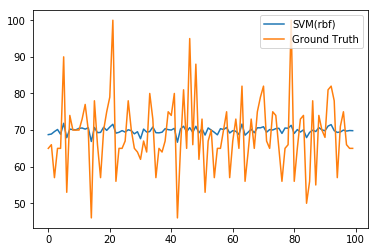

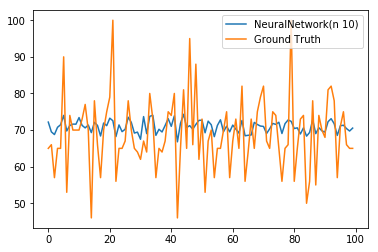

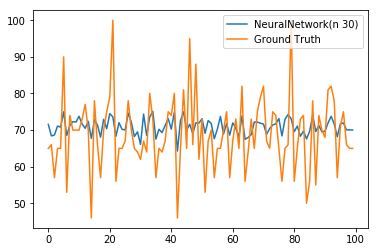

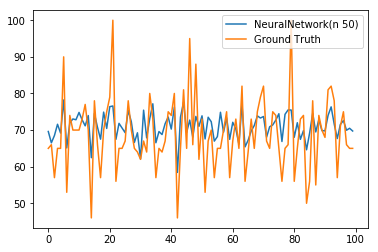

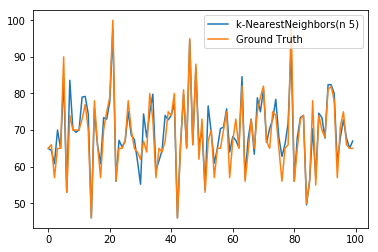

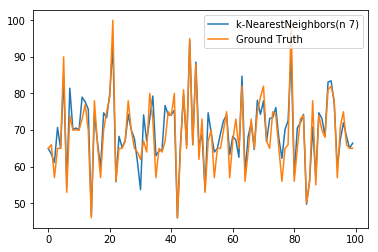

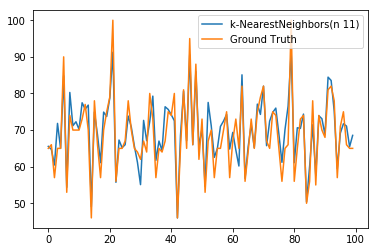

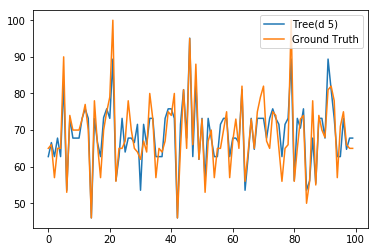

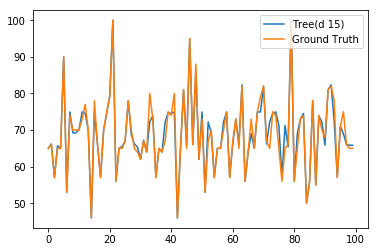

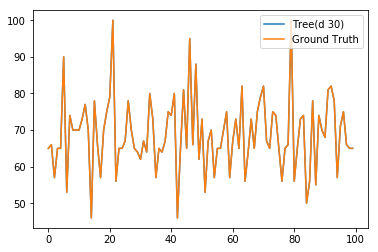

In [0]:
show_results(metrics_list, Y)

##TEST TEST


In [0]:
metrics_list=predAndMetrics(tX,tY)

score_test=pd.DataFrame((i[0:3] for i in metrics_list), columns=["Method","Mean Absolute Error","Mean Squared Error"])
score_test=score_test.round(decimals=2)
score_test


,Method,Mean Absolute Error,Mean Squared Error
0,Linear,4.89,36.57
1,Linear(Ridge),5.12,41.62
2,Linear(Lasso),4.89,36.57
3,"SGD(MSE,fixed)",5.48,47.27
4,"SGD(Huber,fixed)",9.17,137.97
5,"SGD(Huber,adaptive)",8.91,122.67
6,RandomForest(n 55),2.56,12.73
7,RandomForest(n 85),2.56,12.88
8,RandomForest(n 125),2.56,12.86
9,SVM(linear),7.11,81.16


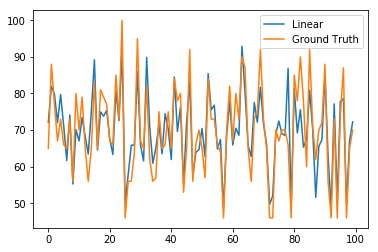

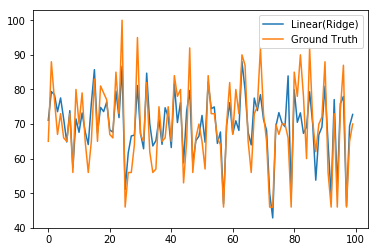

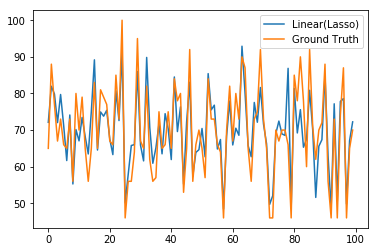

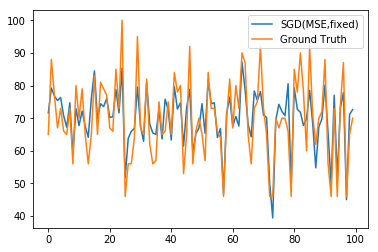

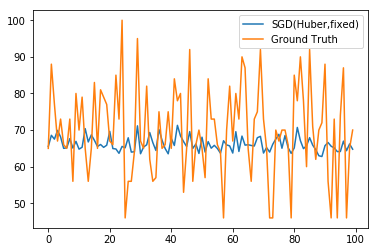

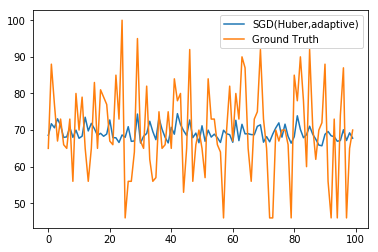

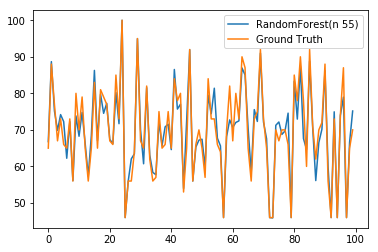

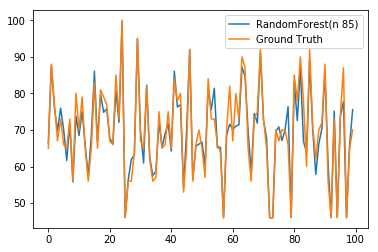

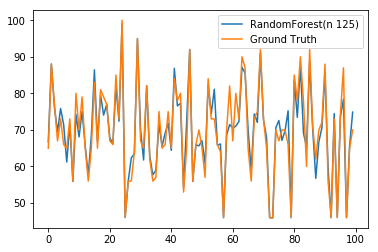

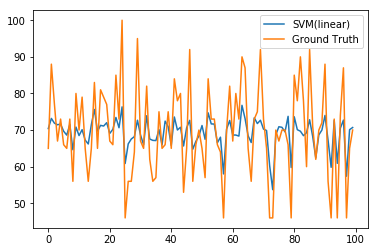

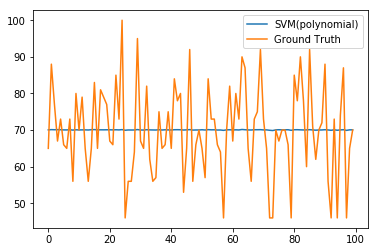

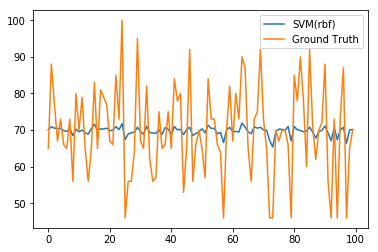

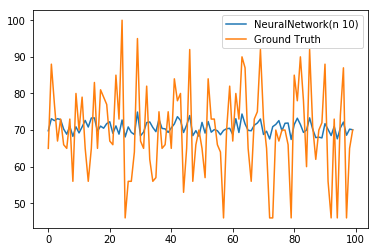

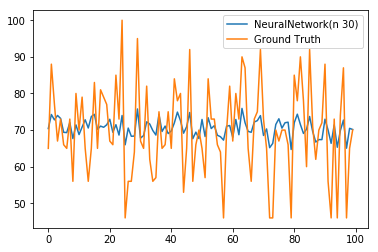

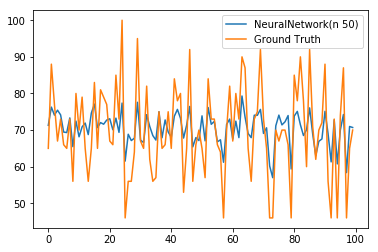

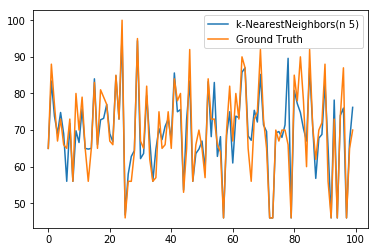

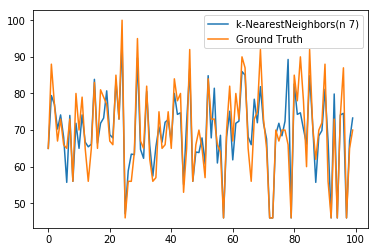

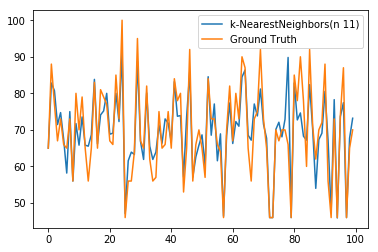

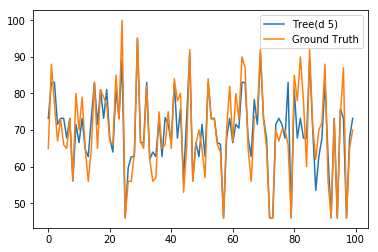

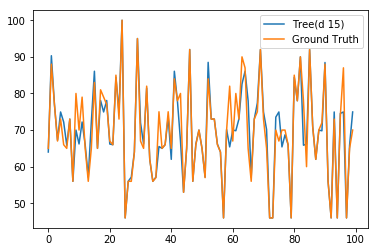

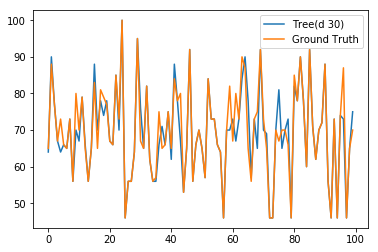

In [0]:
show_results(metrics_list,tY)

In [0]:
score_train.to_csv("score_train.csv")
score_test.to_csv("score_test.csv")